<a href="https://colab.research.google.com/github/NAG-D0/ATM_Interface/blob/main/CV6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segmented image:



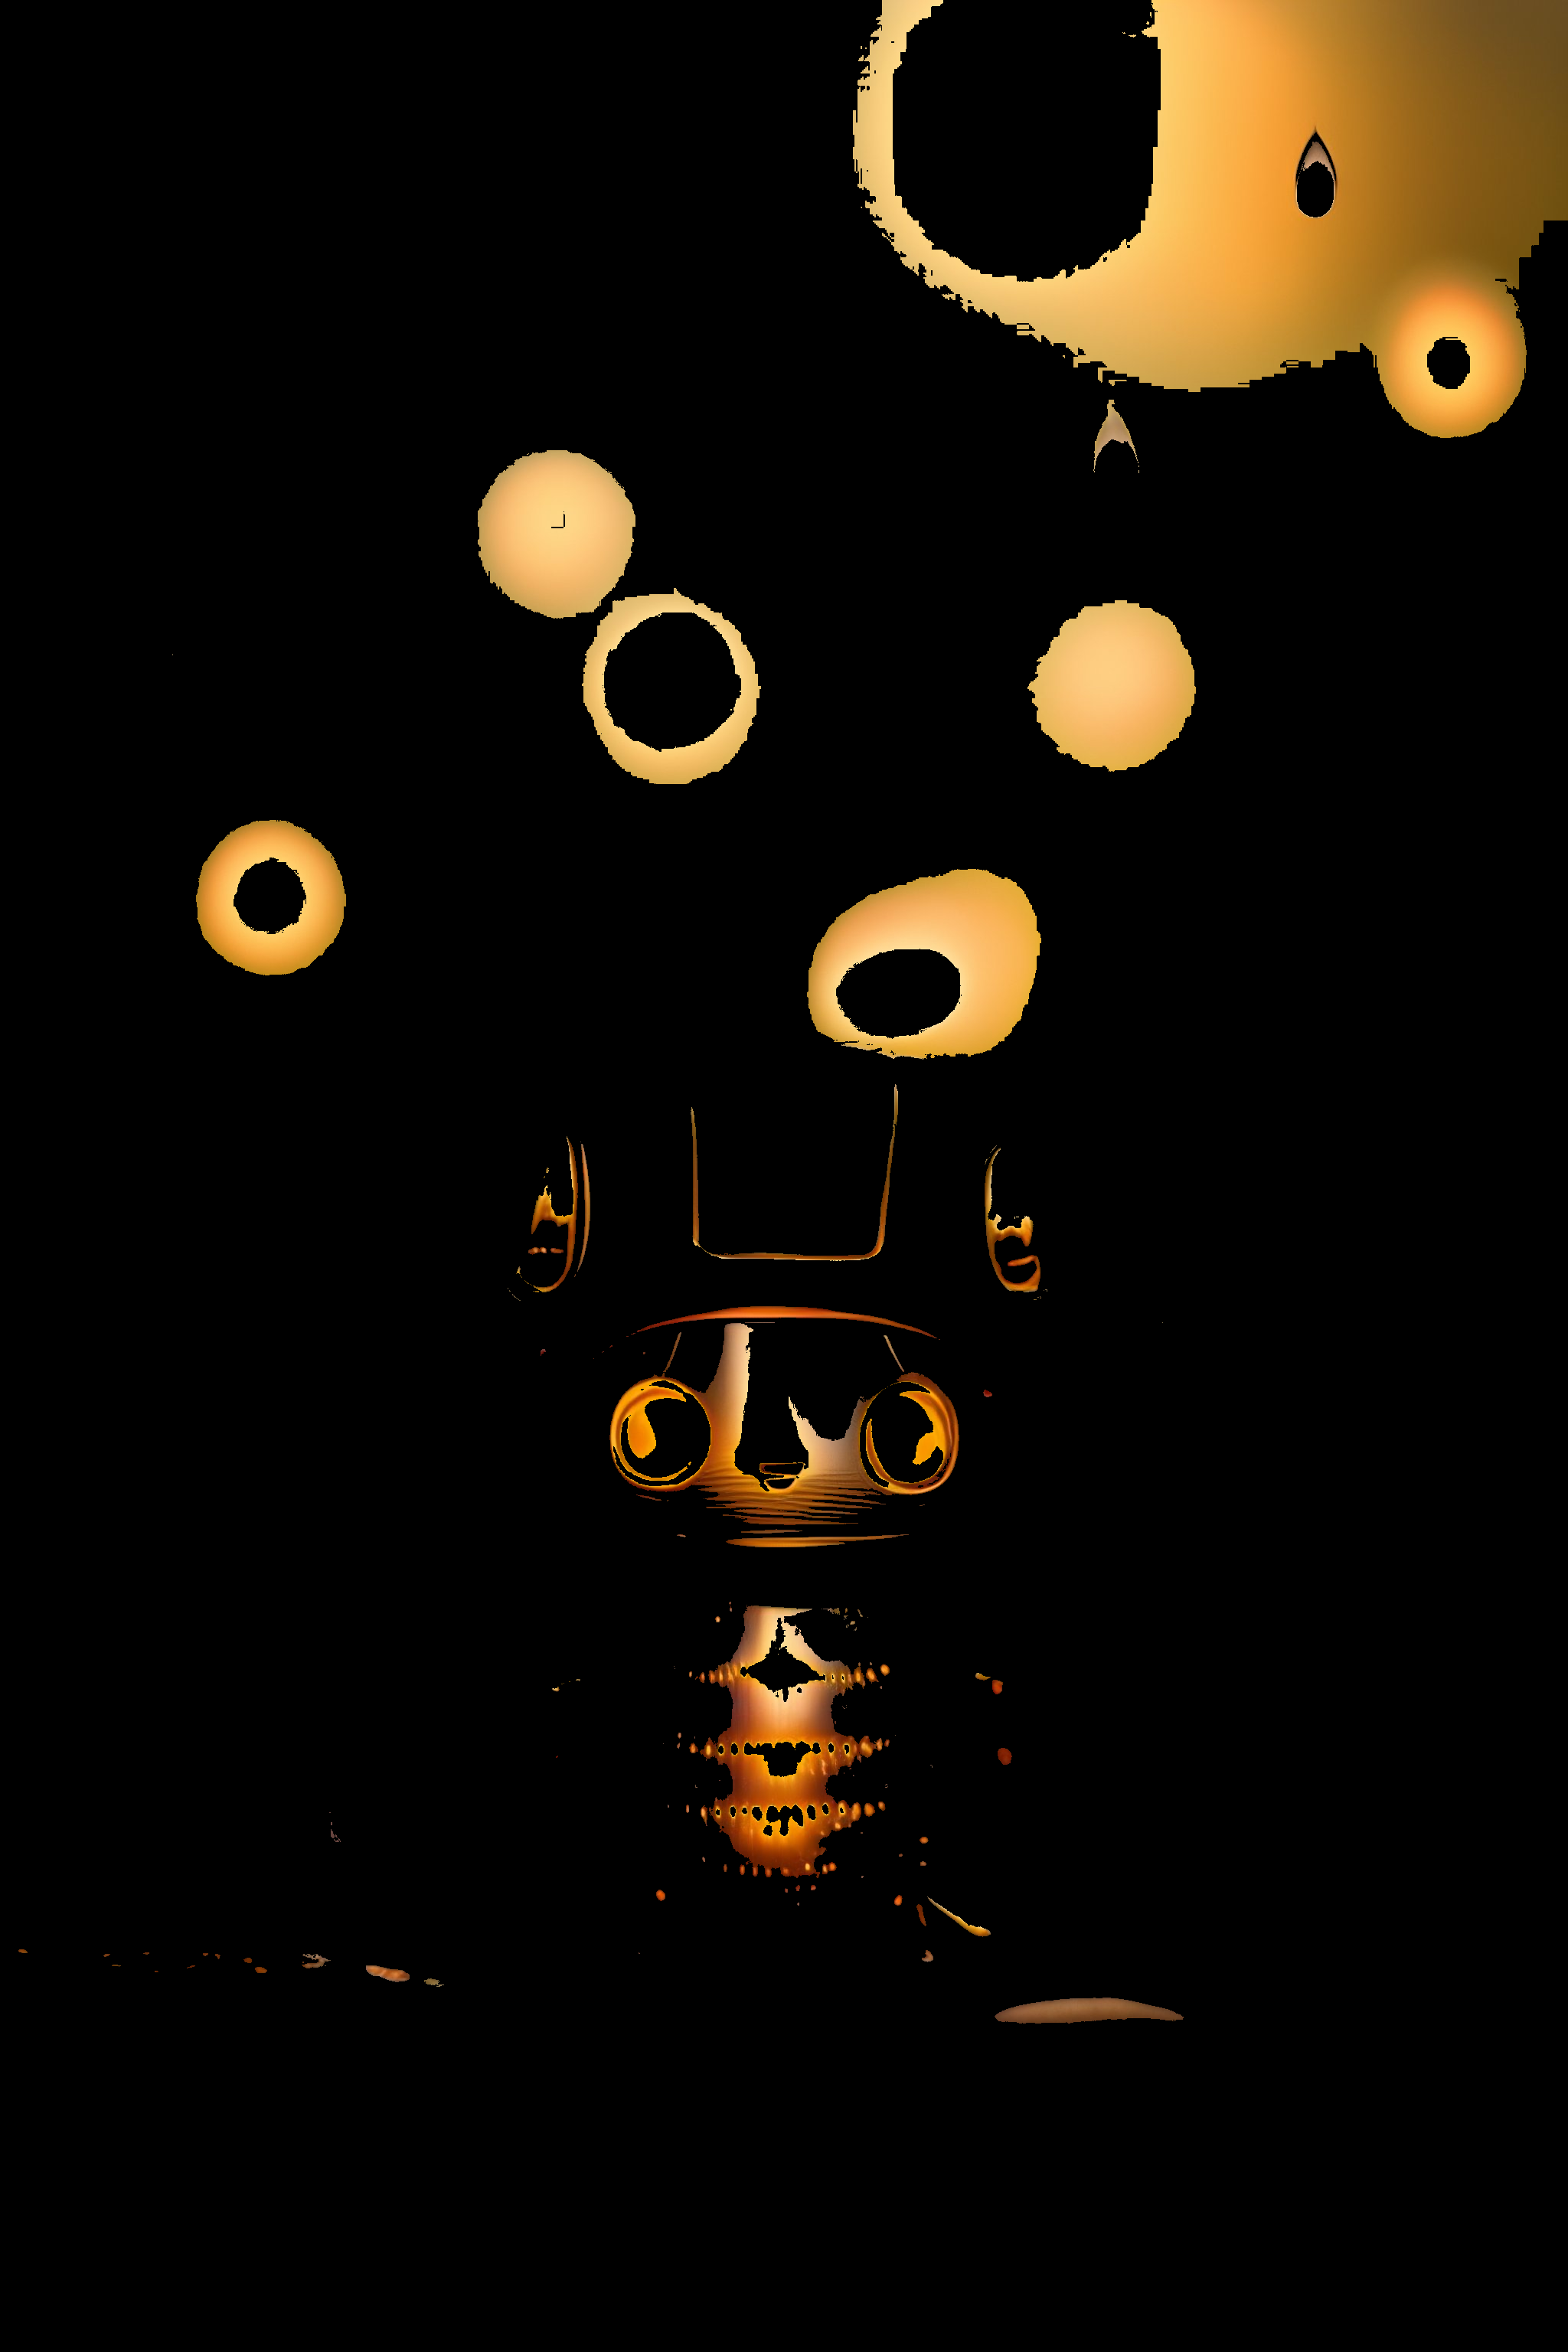

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image_path = 'pc1.jpg'
image = cv2.imread(image_path)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_color_range = np.array([0, 100, 100])
upper_color_range = np.array([20, 255, 255])
color_mask = cv2.inRange(hsv_image, lower_color_range, upper_color_range)
segmented_image = cv2.bitwise_and(image, image, mask=color_mask)
print("Segmented image:\n")
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Original vs. Segmented


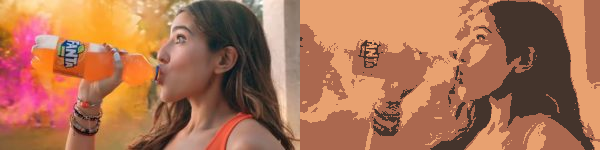

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image_path = "sara.jpg"
image = cv2.imread(image_path)
reshaped_image = image.reshape((-1, 3))
num_clusters = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(reshaped_image.astype(np.float32), num_clusters, None,
criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = centers.round().astype(np.uint8)
segmented_image = centers[labels.flatten()].reshape(image.shape)
combined_image = np.hstack((image, segmented_image))
print("\nOriginal vs. Segmented")
cv2_imshow(combined_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

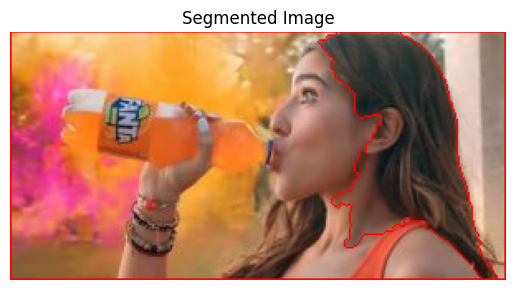

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
image_path = 'sara.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')
plt.show()


[293.20082895827585, 0.016139887170127813, 0.1397046369220732, 0.8990616952964267]
['Pond']
['Pond']
Accuracy of ROC curve is: 100


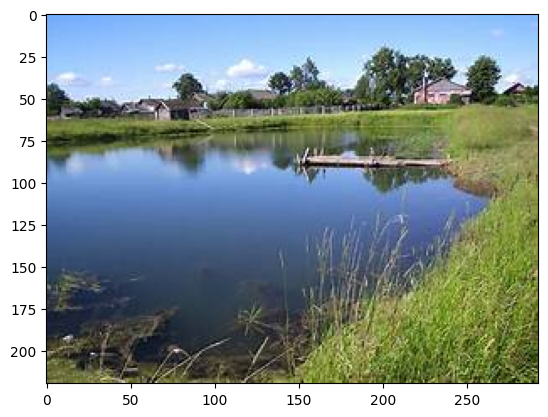

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import skimage
import cv2
def texture_extractions(image):
  gcm_img=skimage.feature.graycomatrix(image,distances=[1],angles=[0],symmetric="True",normed="True")
  contrast = skimage.feature.graycoprops(gcm_img, 'contrast')[0, 0]
  energy = skimage.feature.graycoprops(gcm_img, 'energy')[0, 0]
  homogeneity = skimage.feature.graycoprops(gcm_img, 'homogeneity')[0, 0]
  correlation = skimage.feature.graycoprops(gcm_img, 'correlation')[0, 0]
  return [contrast,energy,homogeneity,correlation]
images=['river.jpeg','pond.jpeg','nature.jpeg']
y=['River','Pond','Nature']
x=[]
for image in images:
 features=texture_extractions(cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY))
 x.append(features)
print(x[0])
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x,y)
def accuracy_scores(img,y_test):
 img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 a=[texture_extractions(img2)]
 y_pred=clf.predict(a)
 print(y_test)
 print(y_pred)
 from sklearn.metrics import accuracy_score
 return int(accuracy_score(y_test,y_pred)*100)
plt.imshow(cv2.cvtColor(cv2.imread('pond.jpeg'),cv2.COLOR_BGR2RGB))
print("Accuracy of ROC curve is:",accuracy_scores(cv2.imread('pond.jpeg'),['Pond']))
